# **Facial Expression Recognition Training Notebook**
### Sara Manrriquez

## Import Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Load Training DataFrame

In [3]:
train = pd.read_csv('/content/gdrive/MyDrive/data (1)/train.csv')
print(train.shape)

(28709, 2)


In [4]:
train.head()

,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


## Label Distribution

In [5]:
emotion_prop = (train.emotion.value_counts() / len(train)).to_frame().sort_index(ascending=True)

emotion_prop

,emotion
0,0.139155
1,0.015187
2,0.142708
3,0.251315
4,0.168240
5,0.110453
6,0.172942


In [6]:
emotions = ['Angry','Disgust','Fear','Happy','Sad','Surprise','Neutral']

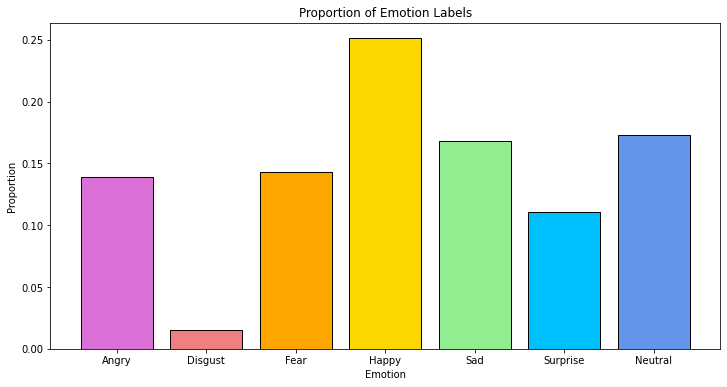

In [7]:
palette = ['orchid', 'lightcoral', 'orange', 'gold', 'lightgreen', 'deepskyblue', 'cornflowerblue']

plt.figure(figsize=[12,6])

plt.bar(x=emotions, height=emotion_prop['emotion'], color=palette, edgecolor='black')
    
plt.xlabel('Emotion')
plt.ylabel('Proportion')
plt.title('Proportion of Emotion Labels')
plt.show()

## View Sample of Images

In [8]:
def pixels_to_array(pixels):
    array = np.array(pixels.split(),'float64')
    return array

def image_reshape(data):
    image = np.reshape(data['pixels'].to_list(),(data.shape[0],48,48,1))
    return image

In [9]:
train['pixels'] = train['pixels'].apply(pixels_to_array)
X = image_reshape(train)
y = train['emotion']

In [10]:
X_lin = train.drop("emotion",axis=1)
X_lin = np.reshape(train['pixels'].to_list(),(train.shape[0],2304))
new = pd.DataFrame(X_lin)
new

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
0,70.0,80.0,82.0,72.0,58.0,58.0,60.0,63.0,54.0,58.0,...,159.0,182.0,183.0,136.0,106.0,116.0,95.0,106.0,109.0,82.0
1,151.0,150.0,147.0,155.0,148.0,133.0,111.0,140.0,170.0,174.0,...,105.0,108.0,95.0,108.0,102.0,67.0,171.0,193.0,183.0,184.0
2,231.0,212.0,156.0,164.0,174.0,138.0,161.0,173.0,182.0,200.0,...,104.0,138.0,152.0,122.0,114.0,101.0,97.0,88.0,110.0,152.0
3,24.0,32.0,36.0,30.0,32.0,23.0,19.0,20.0,30.0,41.0,...,174.0,126.0,132.0,132.0,133.0,136.0,139.0,142.0,143.0,142.0
4,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,12.0,34.0,31.0,31.0,31.0,27.0,31.0,30.0,29.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28704,84.0,85.0,85.0,85.0,85.0,85.0,85.0,85.0,86.0,86.0,...,35.0,34.0,35.0,36.0,40.0,27.0,125.0,231.0,215.0,200.0
28705,114.0,112.0,113.0,113.0,111.0,111.0,112.0,113.0,115.0,113.0,...,83.0,94.0,107.0,120.0,141.0,144.0,132.0,129.0,182.0,222.0
28706,74.0,81.0,87.0,89.0,95.0,100.0,98.0,93.0,105.0,120.0,...,211.0,214.0,211.0,209.0,200.0,195.0,192.0,188.0,187.0,187.0
28707,222.0,227.0,203.0,90.0,86.0,90.0,84.0,77.0,94.0,87.0,...,136.0,139.0,141.0,145.0,137.0,139.0,136.0,136.0,136.0,134.0


## Split Data

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=1)
X_train_lin, X_valid_lin, y_train_lin, y_valid_lin = train_test_split(new, y, test_size=0.9, random_state=1)
X_train_lin = scaler.fit_transform(X_train_lin)
X_valid_lin = scaler.transform(X_valid_lin)

In [14]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
scaler = StandardScaler()
X_train_lin = pca.fit_transform(X_train_lin)
X_valid_lin = pca.transform(X_valid_lin)
X_train_lin = scaler.fit_transform(X_train_lin)
X_valid_lin = scaler.transform(X_valid_lin)

In [15]:
print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)

(22967, 48, 48, 1)
(22967,)
(5742, 48, 48, 1)
(5742,)


In [16]:
print(X_train_lin.shape)
print(y_train_lin.shape)
print(X_valid_lin.shape)
print(y_valid_lin.shape)

(2870, 3)
(2870,)
(25839, 3)
(25839,)


In [17]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf', random_state = 1)
classifier.fit(X_train_lin,y_train_lin)

SVC(random_state=1)

In [19]:
Y_pred = classifier.predict(X_valid_lin)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_valid_lin,Y_pred)
accuracy = float(cm.diagonal().sum())/len(y_valid_lin)
print("\nAccuracy Of SVM For The Given Dataset : ", accuracy)


Accuracy Of SVM For The Given Dataset :  0.25821432717984444


## Build Network

In [ ]:
np.random.seed(1)
tf.random.set_seed(1)

cnn = Sequential([
    Conv2D(64, (3,3), activation = 'relu', padding = 'same', input_shape=(48,48,1)),
    Conv2D(64, (3,3), activation = 'relu', padding = 'same'),
    MaxPooling2D(2,2),
    Dropout(0.25),
    BatchNormalization(),

    Conv2D(128, (3,3), activation = 'relu', padding = 'same'),
    Conv2D(128, (3,3), activation = 'relu', padding = 'same'),
    MaxPooling2D(2,2),
    Dropout(0.5),
    BatchNormalization(),
    
    Conv2D(64, (3,3), activation = 'relu', padding = 'same'),
    Conv2D(64, (3,3), activation = 'relu', padding = 'same'),
    MaxPooling2D(2,2),
    Dropout(0.5),
    BatchNormalization(),

    Flatten(),
    
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.25),
    BatchNormalization(),
    Dense(7, activation='softmax')
])

cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 batch_normalization (BatchN  (None, 24, 24, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 128)       7

## Train Network

In [ ]:
opt = tf.keras.optimizers.Adam(0.001)
cnn.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [ ]:
%%time 

h1 = cnn.fit(
    X_train, y_train, 
    batch_size=256,
    epochs = 20,
    verbose = 1,
    validation_data = (X_valid, y_valid)
)

cnn.pop()
cnn.summary()

Epoch 1/20
90/90 [==============================] - 36s 233ms/step - loss: 2.2144 - accuracy: 0.1830 - val_loss: 6.1661 - val_accuracy: 0.1252
Epoch 2/20
90/90 [==============================] - 17s 189ms/step - loss: 1.9495 - accuracy: 0.2307 - val_loss: 1.8303 - val_accuracy: 0.2734
Epoch 3/20
90/90 [==============================] - 17s 188ms/step - loss: 1.8692 - accuracy: 0.2518 - val_loss: 1.7370 - val_accuracy: 0.2980
Epoch 4/20
90/90 [==============================] - 17s 194ms/step - loss: 1.8135 - accuracy: 0.2716 - val_loss: 1.7341 - val_accuracy: 0.2818
Epoch 5/20
90/90 [==============================] - 17s 188ms/step - loss: 1.7380 - accuracy: 0.3061 - val_loss: 1.7258 - val_accuracy: 0.3015
Epoch 6/20
90/90 [==============================] - 17s 189ms/step - loss: 1.6581 - accuracy: 0.3423 - val_loss: 1.6888 - val_accuracy: 0.3394
Epoch 7/20
90/90 [==============================] - 17s 189ms/step - loss: 1.5788 - accuracy: 0.3869 - val_loss: 1.6067 - val_accuracy: 0.3859

In [ ]:
# cnn.pop()
# feature_mapping = cnn(X_train) 

# from sklearn import svm
# clf = svm.SVC()
# clf.fit(feature_mapping, y_train)

In [ ]:
history = h1.history
print(history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


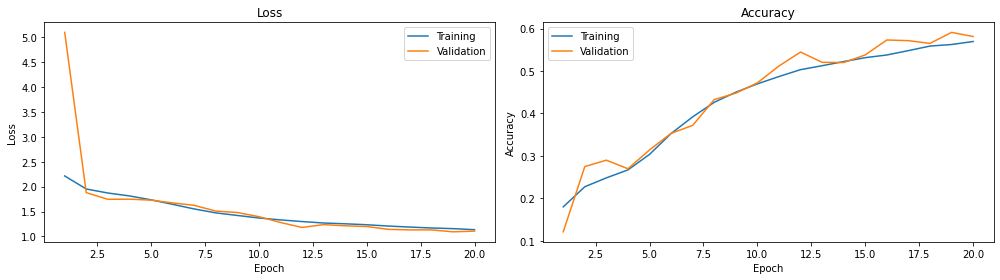

In [ ]:
epoch_range = range(1, len(history['loss'])+1)

plt.figure(figsize=[14,4])
plt.subplot(1,2,1)
plt.plot(epoch_range, history['loss'], label='Training')
plt.plot(epoch_range, history['val_loss'], label='Validation')
plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.title('Loss')
plt.legend()
plt.subplot(1,2,2)
plt.plot(epoch_range, history['accuracy'], label='Training')
plt.plot(epoch_range, history['val_accuracy'], label='Validation')
plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.title('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
tf.keras.backend.set_value(cnn.optimizer.learning_rate, 0.0001)

In [ ]:
%%time 

h2 = cnn.fit(
    X_train, y_train, 
    batch_size=256,
    epochs = 20,
    verbose = 1,
    validation_data = (X_valid, y_valid)
)

Epoch 1/20
90/90 [==============================] - 10s 106ms/step - loss: 1.1040 - accuracy: 0.5842 - val_loss: 1.0525 - val_accuracy: 0.5996
Epoch 2/20
90/90 [==============================] - 9s 99ms/step - loss: 1.0915 - accuracy: 0.5902 - val_loss: 1.0507 - val_accuracy: 0.5996
Epoch 3/20
90/90 [==============================] - 9s 99ms/step - loss: 1.0790 - accuracy: 0.5962 - val_loss: 1.0385 - val_accuracy: 0.6094
Epoch 4/20
90/90 [==============================] - 9s 99ms/step - loss: 1.0751 - accuracy: 0.5989 - val_loss: 1.0324 - val_accuracy: 0.6087
Epoch 5/20
90/90 [==============================] - 9s 100ms/step - loss: 1.0681 - accuracy: 0.5975 - val_loss: 1.0324 - val_accuracy: 0.6085
Epoch 6/20
90/90 [==============================] - 9s 100ms/step - loss: 1.0745 - accuracy: 0.5942 - val_loss: 1.0348 - val_accuracy: 0.6083
Epoch 7/20
90/90 [==============================] - 9s 100ms/step - loss: 1.0555 - accuracy: 0.6026 - val_loss: 1.0281 - val_accuracy: 0.6116
Epoch 8/

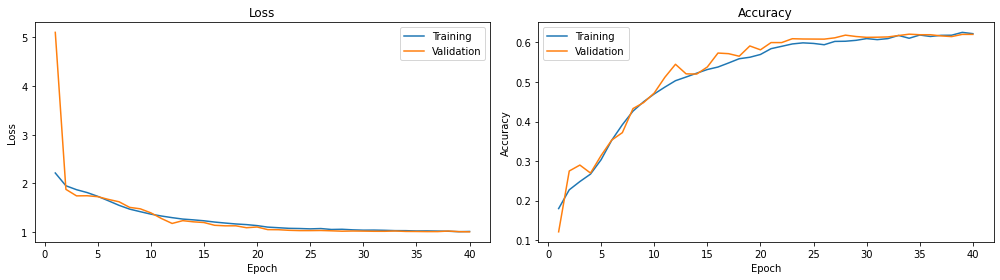

In [ ]:
for k in history.keys():
    history[k] += h2.history[k]

epoch_range = range(1, len(history['loss'])+1)

plt.figure(figsize=[14,4])
plt.subplot(1,2,1)
plt.plot(epoch_range, history['loss'], label='Training')
plt.plot(epoch_range, history['val_loss'], label='Validation')
plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.title('Loss')
plt.legend()
plt.subplot(1,2,2)
plt.plot(epoch_range, history['accuracy'], label='Training')
plt.plot(epoch_range, history['val_accuracy'], label='Validation')
plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.title('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

## Save Model and History

In [ ]:
cnn.save('fer_model_v01.h5')
pickle.dump(history, open(f'fer_v01.pkl', 'wb'))

In [ ]:
print(X_train[0].shape)
print(type(y_train),type(X_train[0]))#,y_train[0])
temp = cnn.predict(X_train[0].reshape((1,48,48,1)))
#print(temp)
#print(temp[0].index(max(temp[0])))
#plt.imshow(X[0],cmap="gray")
#plt.show()

(48, 48, 1)
<class 'pandas.core.series.Series'> <class 'numpy.ndarray'>


In [ ]:
from sklearn.model_selection import KFold
import numpy as np
num_folds = 10